## 03. Data Cleaning 

# (한국어) 데이터 정제
1. 사전 정제 ★
2. 토큰화(tokenization) : 데이터를 일정한 단위(문장/단어/형태소 등)로 구분짓는 일
3. 정규화(nomalization): 형태소 분석 ★
4. 불용어(stop word) 제거 ★
5. 품사 표식(part-of-speech tagging) ★

In [149]:
# 네이버 블로그 데이터 불러오기

import pandas as pd
df = pd.read_csv('MusinsaSuit.csv') #.encoding = 'utf-8'

In [150]:
df

,comment,author,date,num_likes
0,영상 내 출연진 이름을 표기한 자막에 오타가 있어 정정합니다.<br><a href=...,MUSINSA TV,2021-04-16T08:01:36Z,5
1,ㅖㅖㅖㅔㅖㅖㅖㅔㅖㅖㅔㅔㅖㅔㅖㅔㅖㅔㅔㅖㅔㅔㅔㅔㅔㅔㅖㅖㅔㅖㅖㅖㅖㅔㅖㅔㅔㅔㅔㅔㅔㅔㅖㅔㅖㅖ...,박계숙,2021-04-18T14:59:30Z,0
2,제목 수준봐라 ㅋㅋㅋ 수트가 한물가? ㅋㅋㅋㅋ ㅋㅋㅋ야 이 촌것들아 니네 가지아노앤...,mason lee,2021-09-22T13:41:07Z,0
3,김기환대표님이 입으신 옷 구매처 알수있나요,지갬,2021-06-28T06:24:35Z,0
4,제발 수트라고 말해줘..,버질,2021-05-22T16:43:39Z,0
...,...,...,...,...
57,👏♥️👍,심형래 Hyung Rae Shim,2021-04-16T08:04:50Z,8
58,심형래님. 안녕하세요. 손바닥 사랑 엄치척은 사랑입니다. 좋은 하루되세요:),Kihwan Kim,2021-04-20T05:03:59Z,1
59,* 무신사TV의 모든 콘텐츠는 무신사 스토어에서 판매하는 상품의 광고와 판매 지원을...,MUSINSA TV,2021-04-16T08:01:47Z,3
60,쏴리질러,좀도둑,2021-04-16T08:00:28Z,3


In [151]:
# 자신이 분석하고 싶은 columns 선택
posts = df['comment']  #+ ' ' + df['Description'] #title_한 칸 띄움_Description

In [152]:
posts

0     영상 내 출연진 이름을 표기한 자막에 오타가 있어 정정합니다.<br><a href=...
1     ㅖㅖㅖㅔㅖㅖㅖㅔㅖㅖㅔㅔㅖㅔㅖㅔㅖㅔㅔㅖㅔㅔㅔㅔㅔㅔㅖㅖㅔㅖㅖㅖㅖㅔㅖㅔㅔㅔㅔㅔㅔㅔㅖㅔㅖㅖ...
2     제목 수준봐라 ㅋㅋㅋ 수트가 한물가? ㅋㅋㅋㅋ ㅋㅋㅋ야 이 촌것들아 니네 가지아노앤...
3                               김기환대표님이 입으신 옷 구매처 알수있나요
4                                         제발 수트라고 말해줘..
                            ...                        
57                                                 👏♥️👍
58           심형래님. 안녕하세요. 손바닥 사랑 엄치척은 사랑입니다. 좋은 하루되세요:)
59    * 무신사TV의 모든 콘텐츠는 무신사 스토어에서 판매하는 상품의 광고와 판매 지원을...
60                                                 쏴리질러
61                       서울시리김말이님 감사질러~~~~~ 좋은 하루 되세요:)
Name: comment, Length: 62, dtype: object

In [153]:
len(posts)     

62

### 1) 사전정제

In [154]:
# 1)사전정제: 텍스트 내용을 모두 문자(String)로 변경

for i in range(len(posts)):   
    posts[i] = str(posts[i])

<ipython-input-154-411d75b0701f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts[i] = str(posts[i])


#### >> for 반복문 
          - for i in :
          - for i in range():
          - 조건/혹은 range() 범위만큼 반복함수





In [155]:
# 2)사전정제: 정규표현식(분석하고 싶은 형태의 자료만 남기고 삭제)
# 한글: 가-힣, 영어: a-zA-Z, 숫자:0-9

import re                   #re : 정규표현식 사용 library
def text_cleaning(text):
    result = re.sub('[^가-힣a-zA-Z]+', ' ',text)
    return result

In [156]:
# text_cleaning 함수를 통해 정제된 데이터를 원본 데이터에 열(Column)추가

df['clean'] = posts.apply(lambda x: text_cleaning(x)) 

 ###### >> df변수에 'clean'열 추가  
 ###### >> 여기서, lambda 함수 사용
            - 'lamda 매개변수 : 리턴값'으로 작성
            -  함수를 따로 지정하지 않고 쓰는 익명함수

In [157]:
 clean_post = df['clean']

In [158]:
 clean_post

0     영상 내 출연진 이름을 표기한 자막에 오타가 있어 정정합니다 br a href ht...
1                                                      
2          제목 수준봐라 수트가 한물가 야 이 촌것들아 니네 가지아노앤걸링 살 돈은 있냐 
3                               김기환대표님이 입으신 옷 구매처 알수있나요
4                                          제발 수트라고 말해줘 
                            ...                        
57                                                     
58               심형래님 안녕하세요 손바닥 사랑 엄치척은 사랑입니다 좋은 하루되세요 
59     무신사TV의 모든 콘텐츠는 무신사 스토어에서 판매하는 상품의 광고와 판매 지원을 ...
60                                                 쏴리질러
61                             서울시리김말이님 감사질러 좋은 하루 되세요 
Name: clean, Length: 62, dtype: object

In [159]:
 df

,comment,author,date,num_likes,clean
0,영상 내 출연진 이름을 표기한 자막에 오타가 있어 정정합니다.<br><a href=...,MUSINSA TV,2021-04-16T08:01:36Z,5,영상 내 출연진 이름을 표기한 자막에 오타가 있어 정정합니다 br a href ht...
1,ㅖㅖㅖㅔㅖㅖㅖㅔㅖㅖㅔㅔㅖㅔㅖㅔㅖㅔㅔㅖㅔㅔㅔㅔㅔㅔㅖㅖㅔㅖㅖㅖㅖㅔㅖㅔㅔㅔㅔㅔㅔㅔㅖㅔㅖㅖ...,박계숙,2021-04-18T14:59:30Z,0,
2,제목 수준봐라 ㅋㅋㅋ 수트가 한물가? ㅋㅋㅋㅋ ㅋㅋㅋ야 이 촌것들아 니네 가지아노앤...,mason lee,2021-09-22T13:41:07Z,0,제목 수준봐라 수트가 한물가 야 이 촌것들아 니네 가지아노앤걸링 살 돈은 있냐
3,김기환대표님이 입으신 옷 구매처 알수있나요,지갬,2021-06-28T06:24:35Z,0,김기환대표님이 입으신 옷 구매처 알수있나요
4,제발 수트라고 말해줘..,버질,2021-05-22T16:43:39Z,0,제발 수트라고 말해줘
...,...,...,...,...,...
57,👏♥️👍,심형래 Hyung Rae Shim,2021-04-16T08:04:50Z,8,
58,심형래님. 안녕하세요. 손바닥 사랑 엄치척은 사랑입니다. 좋은 하루되세요:),Kihwan Kim,2021-04-20T05:03:59Z,1,심형래님 안녕하세요 손바닥 사랑 엄치척은 사랑입니다 좋은 하루되세요
59,* 무신사TV의 모든 콘텐츠는 무신사 스토어에서 판매하는 상품의 광고와 판매 지원을...,MUSINSA TV,2021-04-16T08:01:47Z,3,무신사TV의 모든 콘텐츠는 무신사 스토어에서 판매하는 상품의 광고와 판매 지원을 ...
60,쏴리질러,좀도둑,2021-04-16T08:00:28Z,3,쏴리질러


### 3) 정규화(형태소 분석) & 4)불용어 제거

In [160]:
# 형태소 분석기 '은전한잎' 설치
import MeCab

In [161]:
# 불용어 리스트
stop_words = '은 는 이 가 것 등 더 를 을 좀 즉 인 때 때문 제 년 편 콘'
stop_words = stop_words.split(' ')

In [162]:
 stop_words

['은',
 '는',
 '이',
 '가',
 '것',
 '등',
 '더',
 '를',
 '을',
 '좀',
 '즉',
 '인',
 '때',
 '때문',
 '제',
 '년',
 '편',
 '콘']

In [163]:
# 3)정규화(형태소 분석) & 4)불용어 제거
from MeCab import Tagger
m = MeCab.Tagger('/Users/yundoyeon/mecab-ko-dic-2.1.1-20180720')
ret = m.parse("드디어 메캅을 설치했다")
ret

'드디어\tMAG,성분부사|시간부사,F,드디어,*,*,*,*\n메\tVV+EC,*,F,메,Inflect,VV,EC,메/VV/*+어/EC/*\n캅\tNNP,인명,T,캅,*,*,*,*\n을\tJKO,*,T,을,*,*,*,*\n설치\tNNG,행위,F,설치,*,*,*,*\n했\tXSV+EP,*,T,했,Inflect,XSV,EP,하/XSV/*+았/EP/*\n다\tEC,*,F,다,*,*,*,*\nEOS\n'

## konlpy 설치 후 형태소 분석기 선택하여 불러오기

from konlpy.tag import Kkma, Hannanum, Komoran, Mecab, Twitter

twitter = Twitter()
mecab = Mecab()
kkma = Kkma()
hannanum = Hannanum()
komoran = Komoran()


In [164]:
from konlpy.tag import Mecab
tokenizer = Mecab()
print(tokenizer.morphs('아버지가방에들어가신다'))

['아버지', '가', '방', '에', '들어가', '신다']


In [165]:
# 명사추출후 불용어 확인
nouns = []    
for i in clean_post:  
    for noun in tokenizer.nouns(i):  #Mecab().nouns 명사도출
        if noun not in stop_words:    
            nouns.append(noun)

nouns

['영상',
 '내',
 '출연진',
 '이름',
 '표기',
 '자막',
 '오타',
 '정정',
 '출연',
 '이름',
 '김기환',
 '김태균',
 '토커',
 '슈트',
 '핏',
 '오늘',
 '출근',
 '룩',
 '추억',
 '속',
 '슈트',
 '이야기',
 '슈트',
 '전성기',
 '언제',
 '영화',
 '속',
 '슈트',
 '핏',
 '정석',
 '영화',
 '슈트',
 '전성기',
 '수',
 '악당',
 '슈트',
 '슈트',
 '디테일',
 '슈트',
 '걸까',
 '제목',
 '수준',
 '수트',
 '물가',
 '촌것',
 '가지',
 '아노',
 '앤',
 '걸',
 '돈',
 '김기환',
 '대표',
 '옷',
 '구매처',
 '수',
 '수트',
 '말',
 '슈트',
 '표준어',
 '여',
 '답변',
 '메',
 '크로',
 '복',
 '이미지',
 '사과',
 '따구',
 '디자인',
 '쪽',
 '직원',
 '외주',
 '해고',
 '계약',
 '조치',
 '건지',
 '페미',
 '코인',
 '남',
 '혐기',
 '업',
 '이미지',
 '껀',
 '답변',
 '부탁',
 '슈트',
 '수트',
 '통일',
 '제발',
 '김태균',
 '이사',
 '말씀',
 '부분',
 '김기환',
 '자막',
 '안녕',
 '답변',
 '감사',
 '수정',
 '하루',
 '저',
 '꼬꼬마',
 '시절',
 '밤',
 '드레스',
 '셔츠',
 '단추',
 '타이',
 '매듭',
 '손',
 '브리프',
 '케이스',
 '손',
 '트렌치코트',
 '퇴근',
 '아버지',
 '눈',
 '나',
 '리차드',
 '기어',
 '에드워드',
 '여인',
 '아메리카',
 '지골',
 '시리즈',
 '수트',
 '거',
 '동경',
 '대학',
 '레리',
 '웅',
 '가로',
 '수트',
 '브리프',
 '케이스',
 '지금',
 '쓰리',
 '피스',
 '수트',
 '스',
 '트라',
 '파타',
 '자켓',
 '르'

### 5) 품사표식

In [166]:
# 5)품사표식

words =[]
for i in clean_post:
    words.extend(tokenizer.pos(i)) #pos: 품사표식 (형태소 토근화_POS tokenization)

In [167]:
words

[('영상', 'NNG'),
 ('내', 'NNB'),
 ('출연진', 'NNG'),
 ('이름', 'NNG'),
 ('을', 'JKO'),
 ('표기', 'NNG'),
 ('한', 'XSA+ETM'),
 ('자막', 'NNG'),
 ('에', 'JKB'),
 ('오타', 'NNG'),
 ('가', 'JKS'),
 ('있', 'VA'),
 ('어', 'EC'),
 ('정정', 'NNG'),
 ('합니다', 'XSV+EF'),
 ('br', 'SL'),
 ('a', 'SL'),
 ('href', 'SL'),
 ('https', 'SL'),
 ('www', 'SL'),
 ('youtube', 'SL'),
 ('com', 'SL'),
 ('watch', 'SL'),
 ('v', 'SL'),
 ('AmvvqG', 'SL'),
 ('sVoQ', 'SL'),
 ('amp', 'SL'),
 ('t', 'SL'),
 ('m', 'SL'),
 ('s', 'SL'),
 ('a', 'SL'),
 ('a', 'SL'),
 ('href', 'SL'),
 ('https', 'SL'),
 ('www', 'SL'),
 ('youtube', 'SL'),
 ('com', 'SL'),
 ('watch', 'SL'),
 ('v', 'SL'),
 ('AmvvqG', 'SL'),
 ('sVoQ', 'SL'),
 ('amp', 'SL'),
 ('t', 'SL'),
 ('m', 'SL'),
 ('s', 'SL'),
 ('a', 'SL'),
 ('출연', 'NNG'),
 ('자', 'XSN'),
 ('이름', 'NNG'),
 ('김기환', 'NNP'),
 ('김태균', 'NNP'),
 ('br', 'SL'),
 ('br', 'SL'),
 ('a', 'SL'),
 ('href', 'SL'),
 ('https', 'SL'),
 ('www', 'SL'),
 ('youtube', 'SL'),
 ('com', 'SL'),
 ('watch', 'SL'),
 ('v', 'SL'),
 ('AmvvqG', 'SL'),


In [168]:
print(len(words))
print(words[:30])

1734
[('영상', 'NNG'), ('내', 'NNB'), ('출연진', 'NNG'), ('이름', 'NNG'), ('을', 'JKO'), ('표기', 'NNG'), ('한', 'XSA+ETM'), ('자막', 'NNG'), ('에', 'JKB'), ('오타', 'NNG'), ('가', 'JKS'), ('있', 'VA'), ('어', 'EC'), ('정정', 'NNG'), ('합니다', 'XSV+EF'), ('br', 'SL'), ('a', 'SL'), ('href', 'SL'), ('https', 'SL'), ('www', 'SL'), ('youtube', 'SL'), ('com', 'SL'), ('watch', 'SL'), ('v', 'SL'), ('AmvvqG', 'SL'), ('sVoQ', 'SL'), ('amp', 'SL'), ('t', 'SL'), ('m', 'SL'), ('s', 'SL')]


In [169]:
df = pd.DataFrame(words, columns=["명사", "type"])
df.head(30)

,명사,type
0,영상,NNG
1,내,NNB
2,출연진,NNG
3,이름,NNG
4,을,JKO
5,표기,NNG
6,한,XSA+ETM
7,자막,NNG
8,에,JKB
9,오타,NNG


In [170]:
# 동사추출: 형태소 분석을 한 결과에서 동사(VV)에 해당하는 형태에 '다'를 추가

verbs = []
for i in words:
    if i[1] == 'VV':
        verbs.append(i[0]+'다')

In [171]:
verbs

['보다',
 '있다',
 '입다',
 '사라지다',
 '아다',
 '입다',
 '있다',
 '맞다',
 '붙다',
 '마시다',
 '하다',
 '타다',
 '굳히다',
 '드리다',
 '나오다',
 '주다',
 '풀다',
 '들다',
 '자다',
 '비비다',
 '입다',
 '들어가다',
 '빨다',
 '들다',
 '입다',
 '주다',
 '보다',
 '배우다',
 '뵈다',
 '담다',
 '주다',
 '입다',
 '가다',
 '생기다',
 '입다',
 '보다',
 '입다',
 '달다',
 '부르다',
 '입다',
 '맞다',
 '입다',
 '보다',
 '어울리다',
 '주다',
 '관심없다',
 '주다',
 '묻다',
 '있다',
 '참다',
 '주다',
 '쓰다',
 '있다',
 '참다',
 '있다',
 '스며드다',
 '찾아뵙다',
 '막히다',
 '달다',
 '풀어내다',
 '하다',
 '주다',
 '보내다',
 '입다',
 '하다',
 '되다',
 '돌아오다',
 '되다',
 '찍다',
 '알다',
 '있다',
 '있다',
 '있다',
 '있다',
 '있다']

In [172]:
#형용사 추출: 형태소 분석을 한 결과에서 형용사(VA)에 해당하는 형태에 '다'를 추가

adjective = []
for i in words:
    if i[1] == 'VA':
        adjective.append(i[0]+'다')

In [173]:
 adjective

['있다',
 '있다',
 '좋다',
 '늦다',
 '좋다',
 '크다',
 '즐겁다',
 '좋다',
 '좋다',
 '좋다',
 '좋다',
 '좋다',
 '좋다',
 '같다',
 '좋다',
 '크다',
 '넓다',
 '좋다',
 '좋다',
 '좋다',
 '즐겁다',
 '좋다',
 '같다',
 '좋다',
 '없다',
 '아쉽다',
 '재밌다',
 '좋다',
 '같다',
 '나다',
 '좋다',
 '나다',
 '좋다',
 '멋있다',
 '멋있다',
 '보람차다',
 '좋다',
 '멋지다',
 '멋지다',
 '좋다',
 '재밌다',
 '좋다',
 '좋다',
 '좋다',
 '재밌다',
 '재밌다',
 '좋다',
 '좋다',
 '좋다',
 '좋다',
 '좋다',
 '좋다',
 '없다',
 '좋다',
 '좋다',
 '반갑다',
 '반갑다',
 '좋다',
 '좋다']

In [174]:
# 단어 개수 카운트 (단어 빈도수 도출)

from collections import Counter

In [175]:
 Frequency_nouns = dict(Counter(nouns))

In [176]:
top_nouns_30 = dict(Counter(nouns).most_common(30))

In [177]:
top_nouns_30

{'감사': 25,
 '안녕': 20,
 '하루': 19,
 '슈트': 17,
 '수트': 17,
 '수': 12,
 '신사': 9,
 '댓글': 7,
 '저': 6,
 '답변': 5,
 '답글': 5,
 '스토어': 5,
 '생각': 4,
 '사항': 4,
 '통보': 4,
 '삭제': 4,
 '영상': 3,
 '김기환': 3,
 '옷': 3,
 '말': 3,
 '조치': 3,
 '나': 3,
 '거': 3,
 '사랑': 3,
 '쿠폰': 3,
 '실망': 3,
 '고객': 3,
 '광고': 3,
 '컨텐츠': 3,
 '판매': 3}

In [178]:
top_nouns_50 = dict(Counter(nouns).most_common(50))

In [179]:
top_nouns_30

{'감사': 25,
 '안녕': 20,
 '하루': 19,
 '슈트': 17,
 '수트': 17,
 '수': 12,
 '신사': 9,
 '댓글': 7,
 '저': 6,
 '답변': 5,
 '답글': 5,
 '스토어': 5,
 '생각': 4,
 '사항': 4,
 '통보': 4,
 '삭제': 4,
 '영상': 3,
 '김기환': 3,
 '옷': 3,
 '말': 3,
 '조치': 3,
 '나': 3,
 '거': 3,
 '사랑': 3,
 '쿠폰': 3,
 '실망': 3,
 '고객': 3,
 '광고': 3,
 '컨텐츠': 3,
 '판매': 3}

# 워드클라우드 시각화

# WordCloud 라이브러리 설치
!pip install wordcloud

#그래프 그리는 라이브러리
!pip install matplotlib

In [180]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def image(data = None):
    wordcloud = WordCloud(background_color = 'white',
                         width = 800, height = 600,font_path='/Users/yundoyeon/Library/Fonts/SEBANG Gothic.ttf').generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

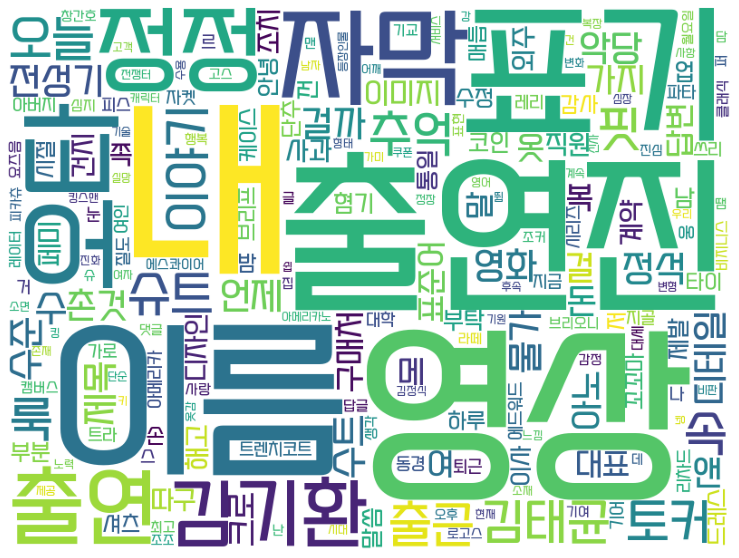

In [181]:
image(' '.join(Frequency_nouns))

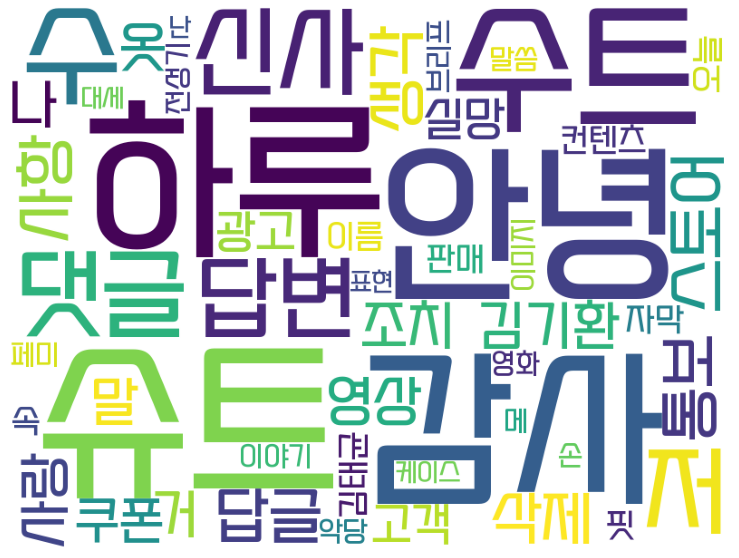

In [182]:
image(' '.join(top_nouns_50))

1. top50 단어(명사)로 워드클라우드
2. 동사 전체로 워드클라우드
3. 형용사 전체로 워드클라우드
4. top30 형용사로 워드클라우드

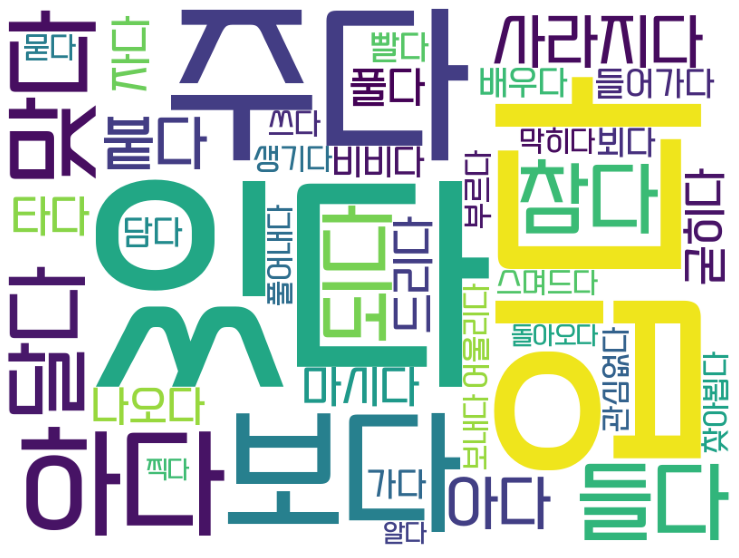

In [183]:
image(' '.join(verbs))

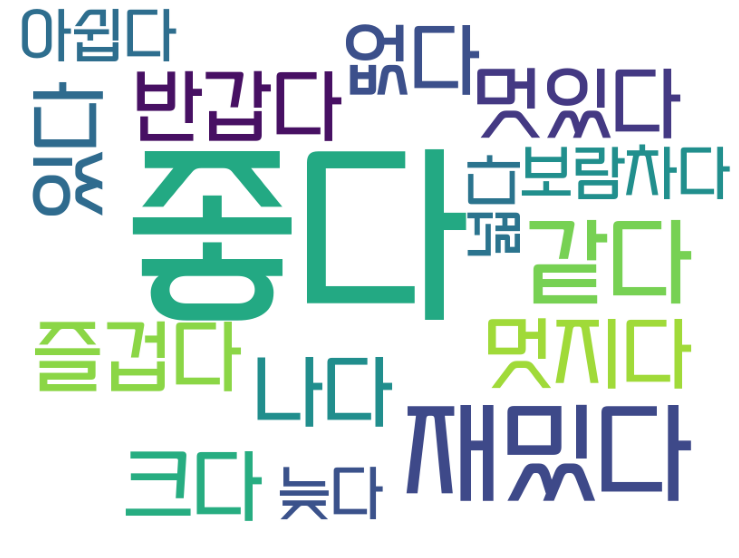

In [184]:
 image(' '.join(adjective))

In [185]:
top_adjective_30 = dict(Counter(adjective).most_common(30))

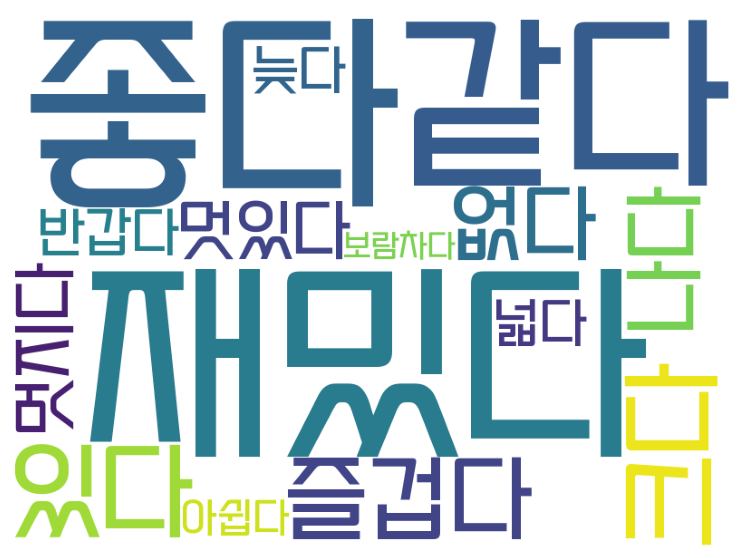

In [186]:
image(' '.join(top_adjective_30))